# Code Walkthrough

## Install the libraries required

Automating the installing of libraries using the `make init` command.  It will download all the packages that are required for running the below cells.

In [1]:
!make init

make: *** No rule to make target `init'.  Stop.


## Model demo

In [20]:
# # uncomment this cell to train the model on the BASE model.
# !make demo-base

In [21]:
# # uncomment this cell to calculate predictions on a demo checkpoint. Estimated runtime: ~7 minutes
# !make predict ckpt=demo/base/model.ckpt hparams=demo/base/hparams.yaml

## Predictions file output

In [22]:
import pandas as pd

print('The predictions file will be a csv file and the head of that file is shown below \n')
preds = pd.read_csv('predictions.csv')
preds.head(10)

The predictions file will be a csv file and the head of that file is shown below 



,id,prediction
0,n000101811a8a843,0.496428
1,n001e1318d5072ac,0.507259
2,n002a9c5ab785cbb,0.483122
3,n002ccf6d0e8c5ad,0.564524
4,n0051ab821295c29,0.486082
5,n008361ac9e9bd47,0.553046
6,n009e95486e1d64c,0.490370
7,n00b093a02b84295,0.554372
8,n00b84e81c983a0a,0.498511
9,n00d453202699c32,0.497949


## EDA

In [23]:
train_data = pd.read_parquet('datasets/numerai_training_data_int8.parquet')

In [24]:
train_data.head()

,era,data_type,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,train,4,2,4,4,0,0,4,4,...,0.25,0.25,0.25,0.00,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000
n003bee128c2fcfc,0001,train,2,4,1,3,0,3,2,3,...,1.00,1.00,1.00,1.00,0.833333,0.666667,0.833333,0.666667,0.833333,0.666667
n0048ac83aff7194,0001,train,2,1,3,0,3,0,3,3,...,0.50,0.25,0.25,0.25,0.500000,0.333333,0.500000,0.333333,0.500000,0.333333
n00691bec80d3e02,0001,train,4,2,2,3,0,4,1,4,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n00b8720a2fdc4f2,0001,train,4,3,4,4,0,0,4,2,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000


In [25]:
print('The shape of training data is ', train_data.shape)

The shape of training data is  (2412105, 1073)


In [14]:
feature_cols = [c for c in train_data if c.startswith("feature_")]
print('Number of feature columns is ', len(feature_cols))

target_cols = [c for c in train_data if c.startswith("target")]
print('Number of target columns is ', len(target_cols))

Number of feature columns is  1050
Number of target columns is  21


In [15]:
era_dict = train_data['era'].value_counts().to_dict()

The mean count of number of entries is 4202.


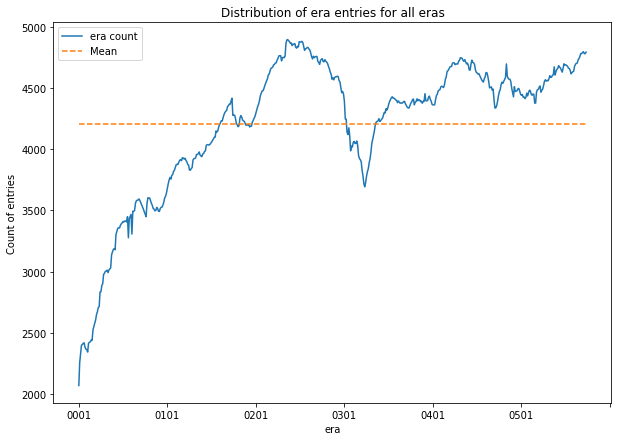

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(len(list(era_dict.values()))))
y = list(era_dict.values())
y_mean = [np.mean(y)]*len(y)
print('The mean count of number of entries is {}.'.format(round(y_mean[0])))
fig = plt.figure(figsize=(10,7))
train_data.groupby('era').size().plot(label='era count')
plt.plot(x, y_mean, label='Mean', linestyle='--')
plt.title('Distribution of era entries for all eras')
plt.ylabel('Count of entries')
plt.legend()
plt.show()

### Correlation between targets

In [17]:
train_data[target_cols].corr()

,target,target_nomi_20,target_nomi_60,target_jerome_20,target_jerome_60,target_janet_20,target_janet_60,target_ben_20,target_ben_60,target_alan_20,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
target,1.000000,1.000000,0.503147,0.769365,0.455448,0.659012,0.392255,0.819540,0.455063,0.678464,...,0.751827,0.441127,0.722665,0.401227,0.819724,0.484425,0.829850,0.490358,0.880602,0.486349
target_nomi_20,1.000000,1.000000,0.503147,0.769365,0.455448,0.659012,0.392255,0.819540,0.455063,0.678464,...,0.751827,0.441127,0.722665,0.401227,0.819724,0.484425,0.829850,0.490358,0.880602,0.486349
target_nomi_60,0.503147,0.503147,1.000000,0.433388,0.817732,0.373979,0.689912,0.456754,0.813261,0.384636,...,0.423820,0.791360,0.409423,0.705469,0.464266,0.873005,0.468459,0.879774,0.492558,0.877989
target_jerome_20,0.769365,0.769365,0.433388,1.000000,0.463756,0.698353,0.382269,0.768737,0.426895,0.628114,...,0.905954,0.446691,0.689335,0.379908,0.865786,0.453824,0.871040,0.457756,0.748965,0.421251
target_jerome_60,0.455448,0.455448,0.817732,0.463756,1.000000,0.382460,0.693168,0.450810,0.821748,0.372656,...,0.451384,0.884963,0.408582,0.719172,0.457941,0.862257,0.459407,0.865918,0.447718,0.789250
target_janet_20,0.659012,0.659012,0.373979,0.698353,0.382460,1.000000,0.422820,0.641273,0.358757,0.718364,...,0.703169,0.370593,0.576267,0.318308,0.724738,0.385911,0.747625,0.395341,0.648114,0.364063
target_janet_60,0.392255,0.392255,0.689912,0.382269,0.693168,0.422820,1.000000,0.378579,0.672070,0.414573,...,0.374259,0.695526,0.341069,0.596787,0.388464,0.720954,0.395379,0.742915,0.386067,0.677794
target_ben_20,0.819540,0.819540,0.456754,0.768737,0.450810,0.641273,0.378579,1.000000,0.485953,0.655087,...,0.745765,0.433137,0.757761,0.418228,0.746513,0.445281,0.755789,0.449744,0.872847,0.476992
target_ben_60,0.455063,0.455063,0.813261,0.426895,0.821748,0.358757,0.672070,0.485953,1.000000,0.373185,...,0.416077,0.786051,0.425653,0.747294,0.424105,0.787089,0.427728,0.795083,0.480622,0.867900
target_alan_20,0.678464,0.678464,0.384636,0.628114,0.372656,0.718364,0.414573,0.655087,0.373185,1.000000,...,0.614438,0.361734,0.581200,0.328936,0.642762,0.381904,0.661255,0.392130,0.702886,0.385541


### Feature with high correlation with target

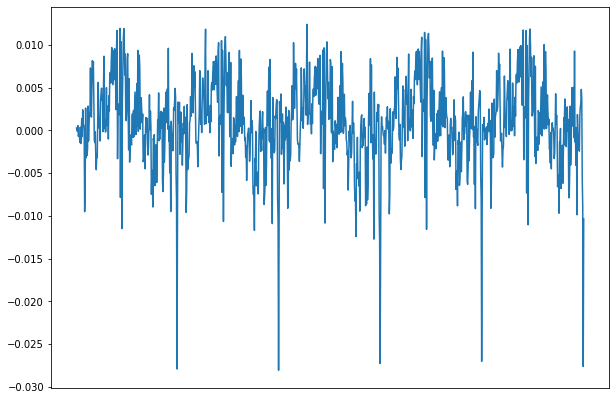

In [11]:
plt.figure(figsize=(10,7))
corr_vals = train_data[feature_cols].corrwith(train_data['target'])
corr_vals.plot()
plt.xticks([], rotation=45)
plt.show()